In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# <center> Examen Ciencia de Datos
# <center>  L1/L2
<center> Angel Cuauhtemoc Fuerte Perez
    
**Seccion A**
    
**Datos abiertos de la CDMX**
    
    
La Agencia Digital de Innovación Pública tiene disponibles datos de las **carpetas de investigación aportados por la PGJ**. La tabla está disponible aquí: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f
    
Utilizando estos datos, responde las siguientes preguntas. Debes desarrollar el código en Phyton:

1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas, solo describe la prueba y lo que te dice cada una.

Las pruebas que haría para asegurar la calidad de los datos serían:
- Confiabilidad, es decir:
    - Exactitud: Verificar que los datos son precisos y que no generan ambigüedades. En esta tabla en particular, me aseguraría de que los datos en cada columna sean coherentes, una forma de verificarlo es agrupando los datos ya sea por años, meses, colonias, alcaldías o delitos. De esta forma podríamos conocer más a fondo si los datos tienen coherencia. Por ejemplo, agrupando los datos por fechas, podríamos conocer con exactitud con cúantos años diferentes trabaja nuestra tabla. A su vez, agrupando los datos por delito podemos conocer cuántos tipos diferentes existen, etc.
    -Integridad: Que sea un formato de datos claro y que cumple con los criterios, tienen integridad estructural y en contenido, esto lo haríamos verificando cada columna.
    - Completitud: Esto nos sirve para conocer si nuestra base de datos llegase a tener deficiencias.
- Calidad de presentación
    - Legilibilidad: Para esta prueba lo que haría sería eliminar la información innecesaria dentro de la base de datos para porporcionar una mejor comprensión, clasificación y contenido acorde a las necesidades del usuario.

In [2]:
print("Ejemplo de identificación de cuántos años maneja la tabla de datos")
df = pd.read_csv("carpetas_completa_septiembre_2021.csv")
lista01 = df.groupby("ao_hechos").size().reset_index(name="cantidad de delitos anuales")
lista01

Ejemplo de identificación de cuántos años maneja la tabla de datos


C:\Users\fuert\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ao_hechos,cantidad de delitos anuales
0,1906.0,1
1,1915.0,2
2,1930.0,1
3,1942.0,1
4,1950.0,2
...,...,...
68,2017.0,227268
69,2018.0,254013
70,2019.0,243898
71,2020.0,201527


2. Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos de pocas ocurrencias)

En principio, notemos que de la tabla anterior, manejamos 73 años diferentes; sin embargo, una gran cantidad de esos años contiene muy poca información, por lo que en base a la siguiente gráfica, podemos hacer inferencias a partir de los últimos 6 años:

<function matplotlib.pyplot.show(close=None, block=None)>

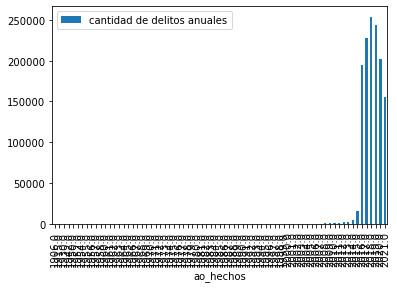

In [3]:
lista01.plot(kind="bar",x="ao_hechos", y="cantidad de delitos anuales")
plt.show

Considerando sólo los últimos años, tenemos:

<function matplotlib.pyplot.show(close=None, block=None)>

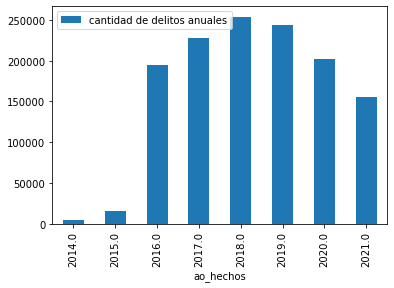

In [4]:
lista02 = lista01.drop(lista01.index[0:65])
lista02.plot(kind="bar",x="ao_hechos", y="cantidad de delitos anuales")
plt.show

Vamos a considerar los datos a partir del 2016. Entonces, verificando los tipos de delitos y el número de incidencias por año, tendríamos la siguiente tabla:

In [5]:
delitos2016 =df[df["ao_hechos"]==2016]
incidencias2016 = delitos2016.groupby("delito").size().reset_index(name="incidencia de delitos 2016")
delitos2017 =df[df["ao_hechos"]==2017]
incidencias2017 = delitos2017.groupby("delito").size().reset_index(name="incidencia de delitos 2017")
delitos2018 =df[df["ao_hechos"]==2018]
incidencias2018 = delitos2018.groupby("delito").size().reset_index(name="incidencia de delitos 2018")
delitos2019 =df[df["ao_hechos"]==2019]
incidencias2019 = delitos2019.groupby("delito").size().reset_index(name="incidencia de delitos 2019")
delitos2020 =df[df["ao_hechos"]==2020]
incidencias2020 = delitos2020.groupby("delito").size().reset_index(name="incidencia de delitos 2020")
delitos2021 =df[df["ao_hechos"]==2021]
incidencias2021 = delitos2021.groupby("delito").size().reset_index(name="incidencia de delitos 2021")

In [6]:
incidencias2016.merge(incidencias2017,on="delito",how="outer").merge(incidencias2018,on="delito",how="outer").merge(incidencias2019,on="delito",how="outer").merge(incidencias2020,on="delito",how="outer").merge(incidencias2021,on="delito",how="outer")

,delito,incidencia de delitos 2016,incidencia de delitos 2017,incidencia de delitos 2018,incidencia de delitos 2019,incidencia de delitos 2020,incidencia de delitos 2021
0,ABANDONO DE PERSONA,621.0,671.0,588.0,NaN,NaN,NaN
1,ABORTO,115.0,82.0,114.0,133.0,83.0,68.0
2,ABUSO DE AUTORIDAD,1249.0,1291.0,1689.0,NaN,NaN,NaN
3,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,4.0,13.0,87.0,2186.0,1927.0,1465.0
4,ABUSO DE CONFIANZA,3254.0,3828.0,4019.0,3830.0,3628.0,2764.0
...,...,...,...,...,...,...,...
340,TENTATIVA DE FEMINICIDIO,NaN,NaN,NaN,NaN,12.0,38.0
341,VIOLACION A LOS DERECHOS HUMANOS,NaN,NaN,NaN,NaN,1.0,NaN
342,EJERCICIO INDEBIDO DEL PROPIO DER.,NaN,NaN,NaN,NaN,NaN,1.0
343,ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) SIN ...,NaN,NaN,NaN,NaN,NaN,1.0


A partir de esta tabla de datos resumida podemos hacer dos análisis:

 - el primero consiste en solamente considerar las diferencias entre los años 2020 y 2019, y las diferencias entre los años 2020 y 2021. Después de revisar los valores, dependiendo su signo podríamos hacer inferencias a partir de estos datos.
 - el segundo análisis y el que considero mucho mejor es entrenar una red neuronal para que haga inferencias acerca del crecimiento (o decrecimiento) de los delitos. Para hacer esto asignaríamos pesos más fuertes a los últimos dos años para que nuestra función de pérdida nos indique la dirección de la pendiente de los datos.

3.¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que es esto?

Vamos a usar la suma total de los delitos a través de todos los años mencionados en la tabla. 

In [7]:
alcaldia = df.groupby("alcaldia_hechos").size().reset_index(name="número total de delitos")
orderalcaldia = alcaldia.sort_values(["número total de delitos"])
orderalcaldia

,alcaldia_hechos,número total de delitos
0,ABALA,1
373,SAN JUAN DE LOS LAGOS,1
371,SAN JUAN BAUTISTA ATATLAHUCA,1
170,ERONGARICUARO,1
370,SAN JOSE ITURBIDE,1
...,...,...
30,ALVARO OBREGON,88946
70,BENITO JUAREZ,107516
186,GUSTAVO A MADERO,131319
221,IZTAPALAPA,196158


La tabla anterior nos muestra que hay 557 alcaldías; sin embargo, actualmente esto no es cierto y el problema es debido a que muchos de los datos iniciales en la columna de alcaldía son en realidad municipios o lugares fuera de la CDMX. A pesar de ello, los datos que no son de alcaldías son de menor incidencia puesto que si observamos los primeros 530 datos vemos que el número de delitos no es importante:

In [8]:
orderalcaldia.head(530)

,alcaldia_hechos,número total de delitos
0,ABALA,1
373,SAN JUAN DE LOS LAGOS,1
371,SAN JUAN BAUTISTA ATATLAHUCA,1
170,ERONGARICUARO,1
370,SAN JOSE ITURBIDE,1
...,...,...
497,TOLUCA,126
513,VALLE DE CHALCO SOLIDARIDAD,128
507,TULTITLAN,134
55,ATIZAPAN DE ZARAGOZA,137


Podemos así notar que los datos correspondientes a las 16 alcaldías se encuentran ordenados de menor a mayor:

In [9]:
orderalcaldia.tail(16)

,alcaldia_hechos,número total de delitos
282,MILPA ALTA,9561
140,CUAJIMALPA DE MORELOS,19527
243,LA MAGDALENA CONTRERAS,21513
477,TLAHUAC,32444
529,XOCHIMILCO,41203
220,IZTACALCO,54310
67,AZCAPOTZALCO,63570
516,VENUSTIANO CARRANZA,75034
483,TLALPAN,76792
281,MIGUEL HIDALGO,84626


Por lo tanto, la alcaldía con mayor número de delitos es CUAUHTEMOC, mientras que la de menor número es MILPA ALTA. Esto puede deberse a varios factores, en principio la ubicación geográfica, ya que las alcaldías del noroeste presentan un mayor índice de delitos:
![Imagen](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/MX-DF-Divisi%C3%B3n_pol%C3%ADtica.svg/800px-MX-DF-Divisi%C3%B3n_pol%C3%ADtica.svg.png)



Analizando ahora los delitos más incidentes de las tres alcaldías con mayor número de delitos tenemos lo siguiente:

In [10]:
cuauhtemoc = df[df["alcaldia_hechos"]=="CUAUHTEMOC"]
delitosCuauhtemoc = cuauhtemoc.groupby("delito").size().reset_index(name="incidencia de delito en CUAUHTEMOC")
delitosOrdenadosCuau = delitosCuauhtemoc.sort_values(["incidencia de delito en CUAUHTEMOC"])
delitosOrdenadosCuau.tail(10)

,delito,incidencia de delito en CUAUHTEMOC
4,ABUSO DE CONFIANZA,4251
201,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,5317
246,ROBO DE ACCESORIOS DE AUTO,7485
56,DENUNCIA DE HECHOS,8559
10,AMENAZAS,9216
239,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,9876
190,ROBO A NEGOCIO SIN VIOLENCIA,10867
315,VIOLENCIA FAMILIAR,10981
260,ROBO DE OBJETOS,14568
91,FRAUDE,20489


In [11]:
iztapalapa = df[df["alcaldia_hechos"]=="IZTAPALAPA"]
delitosIztapalapa = iztapalapa.groupby("delito").size().reset_index(name="incidencia de delito en IZTAPALAPA")
delitosOrdenadosIzta = delitosIztapalapa.sort_values(["incidencia de delito en IZTAPALAPA"])
delitosOrdenadosIzta.tail(10)

,delito,incidencia de delito en IZTAPALAPA
171,ROBO A CASA HABITACION SIN VIOLENCIA,4202
123,NARCOMENUDEO POSESION SIMPLE,4463
52,DENUNCIA DE HECHOS,5534
262,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,5726
84,FRAUDE,6775
252,ROBO DE OBJETOS,9865
178,ROBO A NEGOCIO SIN VIOLENCIA,10478
10,AMENAZAS,11392
232,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,12645
307,VIOLENCIA FAMILIAR,24910


In [12]:
gustavoamadero = df[df["alcaldia_hechos"]=="GUSTAVO A MADERO"]
delitosGus = gustavoamadero.groupby("delito").size().reset_index(name="incidencia de delito en GUSTAVO A MADERO")
delitosOrdenadosGus = delitosGus.sort_values(["incidencia de delito en GUSTAVO A MADERO"])
delitosOrdenadosGus.tail(10)

,delito,incidencia de delito en GUSTAVO A MADERO
171,ROBO A CASA HABITACION SIN VIOLENCIA,3226
52,DENUNCIA DE HECHOS,3708
233,ROBO DE ACCESORIOS DE AUTO,3999
256,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,4323
85,FRAUDE,5861
246,ROBO DE OBJETOS,6063
226,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,6460
178,ROBO A NEGOCIO SIN VIOLENCIA,7064
10,AMENAZAS,7331
297,VIOLENCIA FAMILIAR,16274


Dentro de los principales delitos se encuentran fraude, violencia familiar, amenazas, robo sin violencia y robo de autopartes; por lo que otra de las razones por las cuáles estas son las alcaldías de mayor índice de delitos es debido a la cantidad de vehículos con piezas para ventas de mercado negro, la cultura de la familia se encuentra en mal estado, y el robo sin violencia puede deberse a falta de educación o de oportunidades laborales en la zona norte de la CDMX.

4. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX?

Analizando los datos por la fecha de inicio en que se dió el delito, podemos verficicar que algunos delitos no tienen fecha conocida, sin embargo el porcentaje de datos desconocidos en fecha es de aproximadamente 0.03%, con lo cual podemos despreciar este valor sin afectar nuestras inferencias.

In [13]:
dfcom = df.fillna("Desconocido")
dfM= dfcom[["mes_hechos"]]
dfMT = dfM.groupby("mes_hechos").size().reset_index(name="numero_de_delitos_totales_en_el_mes").sort_values("numero_de_delitos_totales_en_el_mes")
dfMT

,mes_hechos,numero_de_delitos_totales_en_el_mes
2,Desconocido,444
3,Diciembre,94614
10,Noviembre,97846
11,Octubre,103502
0,Abril,107191
7,Junio,109977
5,Febrero,110276
12,Septiembre,111021
6,Julio,111562
4,Enero,111719


Verificamos que la suma de los delitos es el total de eventos:

In [14]:
dfMT["numero_de_delitos_totales_en_el_mes"].sum()

1307211

y despreciamos el valor de delitos con fecha desconocida. Despúes graficamos la cantidad de delitos totales por mes:

<function matplotlib.pyplot.show(close=None, block=None)>

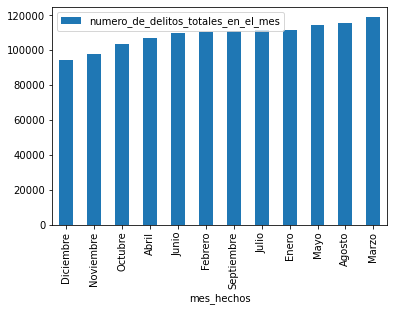

In [15]:
dfMT1 = dfMT.drop(dfMT.index[0:1])
dfMT1.plot(kind="bar", x="mes_hechos", y="numero_de_delitos_totales_en_el_mes")
plt.show

Vamos a analizar la media y la desviación estándar de los datos muestrales:

In [16]:
dfMT.mean()

numero_de_delitos_totales_en_el_mes    100554.692308
dtype: float64

In [17]:
dfMT.std()

numero_de_delitos_totales_en_el_mes    30843.185199
dtype: float64

Como podemos observar, la desviación estándar de los datos es realmente baja, sobre todo si consideramos que aún no tenemos los datos completos del año 2021 puesto que no tenemos las estadísticas de noviembre y diciembre, y la estadística de octubre está incompleta. 

Con estos datos podemos concluir que realmente no hay una tendencia estacional de ocurrencia de delitos, una de las causas por las que esto sucede es que los delitos más significativos suceden en cualquier época del año.

5. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

Vamos primero analizar las incididencias de delitos por alcaldías:

In [18]:
benitoj = df[df["alcaldia_hechos"]=="BENITO JUAREZ"]
delitosBen = benitoj.groupby("delito").size().reset_index(name="incidencia de delito en BENITOJ")

alvaro = df[df["alcaldia_hechos"]=="ALVARO OBREGON"]
delitosalv = alvaro.groupby("delito").size().reset_index(name="incidencia de delito en ALVARO")

coyoacan = df[df["alcaldia_hechos"]=="COYOACAN"]
delitoscoy = coyoacan.groupby("delito").size().reset_index(name="incidencia de delito en COYOACAN")

miguel = df[df["alcaldia_hechos"]=="MIGUEL HIDALGO"]
delitosmig = miguel.groupby("delito").size().reset_index(name="incidencia de delito en MIGUEL_H")

tlalpan = df[df["alcaldia_hechos"]=="TLALPAN"]
delitosTla = tlalpan.groupby("delito").size().reset_index(name="incidencia de delito en TLALPAN")

venustiano = df[df["alcaldia_hechos"]=="VENUSTIANO CARRANZA"]
delitosVenus = venustiano.groupby("delito").size().reset_index(name="incidencia de delito en VENUSTIANO")

azcapo = df[df["alcaldia_hechos"]=="AZCAPOTZALCO"]
delitosAzc = azcapo.groupby("delito").size().reset_index(name="incidencia de delito en AZCAPOTZALCO")

iztacalco = df[df["alcaldia_hechos"]=="IZTACALCO"]
delitosIz = iztacalco.groupby("delito").size().reset_index(name="incidencia de delito en IZTACALCO")

xochimilco = df[df["alcaldia_hechos"]=="XOCHIMILCO"]
delitosXoc = xochimilco.groupby("delito").size().reset_index(name="incidencia de delito en XOCHIMILCO")

tlahuac = df[df["alcaldia_hechos"]=="TLAHUAC"]
delitosTlah = xochimilco.groupby("delito").size().reset_index(name="incidencia de delito en TLAHUAC")

magdalena = df[df["alcaldia_hechos"]=="LA MAGDALENA CONTRERAS"]
delitosMag = magdalena.groupby("delito").size().reset_index(name="incidencia de delito en MAGDALENA")

cuajimalpa = df[df["alcaldia_hechos"]=="CUAJIMALPA DE MORELOS"]
delitosCuaj = cuajimalpa.groupby("delito").size().reset_index(name="incidencia de delito en CUAJIMALPA")

milpa = df[df["alcaldia_hechos"]=="MILPA ALTA"]
delitosMilp = milpa.groupby("delito").size().reset_index(name="incidencia de delito en MILPA ALTA")

tablaCompleta = delitosCuauhtemoc.merge(delitosIztapalapa,on="delito",how="outer").merge(delitosGus,on="delito",how="outer").merge(delitosBen,on="delito",how="outer").merge(delitosalv,on="delito",how="outer").merge(delitoscoy,on="delito",how="outer").merge(delitosmig,on="delito",how="outer").merge(delitosTla,on="delito",how="outer").merge(delitosVenus,on="delito",how="outer").merge(delitosAzc,on="delito",how="outer").merge(delitosIz,on="delito",how="outer").merge(delitosXoc,on="delito",how="outer").merge(delitosTlah,on="delito",how="outer").merge(delitosMag,on="delito",how="outer").merge(delitosCuaj,on="delito",how="outer").merge(delitosMilp,on="delito",how="outer")

tablaCompleta

,delito,incidencia de delito en CUAUHTEMOC,incidencia de delito en IZTAPALAPA,incidencia de delito en GUSTAVO A MADERO,incidencia de delito en BENITOJ,incidencia de delito en ALVARO,incidencia de delito en COYOACAN,incidencia de delito en MIGUEL_H,incidencia de delito en TLALPAN,incidencia de delito en VENUSTIANO,incidencia de delito en AZCAPOTZALCO,incidencia de delito en IZTACALCO,incidencia de delito en XOCHIMILCO,incidencia de delito en TLAHUAC,incidencia de delito en MAGDALENA,incidencia de delito en CUAJIMALPA,incidencia de delito en MILPA ALTA
0,ABANDONO DE PERSONA,652.0,290.0,203.0,173.0,141.0,133.0,93.0,123.0,90.0,89.0,106.0,87.0,87.0,31.0,26.0,18.0
1,ABORTO,41.0,119.0,95.0,20.0,72.0,14.0,22.0,39.0,52.0,11.0,22.0,15.0,15.0,16.0,8.0,11.0
2,ABUSO DE AUTORIDAD,1291.0,854.0,463.0,164.0,155.0,207.0,246.0,113.0,295.0,146.0,149.0,93.0,93.0,39.0,36.0,15.0
3,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,1225.0,1267.0,516.0,247.0,337.0,229.0,265.0,218.0,465.0,188.0,251.0,147.0,147.0,86.0,69.0,39.0
4,ABUSO DE CONFIANZA,4251.0,2509.0,1933.0,2649.0,1518.0,1427.0,1568.0,1222.0,1397.0,1160.0,876.0,575.0,575.0,283.0,528.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,EJERCICIO INDEBIDO DEL PROPIO DER.,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,EJERCICIO ABUSIVO DE FUNCIONES,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
340,"PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL ...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,PROCREACION ASISTIDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora veremos el máximo de todos los valores en cada fila y los ordenaremos para obtener el top de los delitos con incidencias máximas por alcaldía:

In [19]:
Tabladevaloresmax = tablaCompleta.max(axis=1)
library1={"Número Máximo de delitos":Tabladevaloresmax}
numericos = pd.DataFrame(data=library1)
numericos

,Número Máximo de delitos
0,652.0
1,119.0
2,1291.0
3,1267.0
4,4251.0
...,...
338,1.0
339,1.0
340,1.0
341,1.0


A continuación veremos cúal alcaldía es la que contiene el elemento máximo según el tipo de delito.

In [20]:
Maximoselementos = tablaCompleta.drop(columns=["delito"]).idxmax(axis=1)
dat={"Alcadias_Maximos_elementos": Maximoselementos}
datos = pd.DataFrame(data=dat)

In [21]:
tabladeDelitos = pd.DataFrame(data=tablaCompleta["delito"])

In [22]:
Match = pd.concat([tabladeDelitos,datos,numericos], axis=1)
MatchOr = Match.sort_values("Número Máximo de delitos")
MatchOr

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
342,SECUESTRO,incidencia de delito en XOCHIMILCO,1.0
313,VIOLACION TUMULTUARIA EQUIPARADA,incidencia de delito en CUAUHTEMOC,1.0
314,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,incidencia de delito en CUAUHTEMOC,1.0
316,INCESTO,incidencia de delito en IZTAPALAPA,1.0
254,ROBO DE INFANTE,incidencia de delito en CUAUHTEMOC,1.0
...,...,...,...
10,AMENAZAS,incidencia de delito en IZTAPALAPA,11392.0
239,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,incidencia de delito en IZTAPALAPA,12645.0
260,ROBO DE OBJETOS,incidencia de delito en CUAUHTEMOC,14568.0
91,FRAUDE,incidencia de delito en CUAUHTEMOC,20489.0


Para ver los delitos que más caracterizan a cada alcaldía simplemente hacemos el siguiente análisis:

In [23]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en CUAUHTEMOC"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
91,FRAUDE,incidencia de delito en CUAUHTEMOC,20489.0


In [24]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en IZTAPALAPA"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
315,VIOLENCIA FAMILIAR,incidencia de delito en IZTAPALAPA,24910.0


In [25]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en GUSTAVO A MADERO"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
192,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,incidencia de delito en GUSTAVO A MADERO,1680.0


In [26]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en BENITOJ"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
246,ROBO DE ACCESORIOS DE AUTO,incidencia de delito en BENITOJ,8688.0


In [27]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en ALVARO"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
199,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,incidencia de delito en ALVARO,2705.0


In [28]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en COYOACAN"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
268,ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLE...,incidencia de delito en COYOACAN,29.0


In [29]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en MIGUEL_H"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
263,ROBO DE PLACA DE AUTOMOVIL,incidencia de delito en MIGUEL_H,648.0


In [30]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en TLALPAN"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
51,DELITOS AMBIENTALES,incidencia de delito en TLALPAN,490.0


In [31]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en VENUSTIANO"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
99,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR,incidencia de delito en VENUSTIANO,78.0


In [32]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en AZCAPOTZALCO"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
235,ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA,incidencia de delito en AZCAPOTZALCO,553.0


In [33]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en IZTACALCO"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
276,"ROBO EN EVENTOS MASIVOS (DEPORTIVOS, CULTURALE...",incidencia de delito en IZTACALCO,94.0


In [34]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en XOCHIMILCO"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
215,ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA,incidencia de delito en XOCHIMILCO,45.0


In [35]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en TLAHUAC"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos


In [36]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en MAGDALENA"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos


In [37]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en CUAJIMALPA"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos
136,OPOSICION A LA OBRA PUBLICA,incidencia de delito en CUAJIMALPA,3.0


In [38]:
MatchOr[MatchOr["Alcadias_Maximos_elementos"]=="incidencia de delito en MILPA ALTA"].tail(1)

,delito,Alcadias_Maximos_elementos,Número Máximo de delitos


Como una última observación, las alcaldías TLAHUAC, MAGDALENA CONTRERAS Y MILPA ALPA no tienen elementos máximos porque cualquier delito que ha sucedido en dichas delegaciones, ha sucedido más veces en alguna otra alcaldía a través de los años.

6. Diseñar un indicador  que mida el nivel de "inseguridad". Genéralo al nivel de desaregación quete parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué desiciones se podrían tomar con el indicador?

Aquí podríamos obtener el nivel de inseguridad de colonia CON RESPECTO a su alcaldía. Lo que haríamos sería aprovechar que ya tenemos las tablas **completas** de incidencias de delitos POR CADA ALCALDÍA, entonces obtenemos el promedio de delitos por alcaldía y creamos una tabla con condicionales de tal forma que si la colonia rebasa al promedio sería un nivel alto de peligro, mientras que si está en por debajo del quantil correspondiente entre 0% y 20% es de menor riesgo, y si el complemento es el caso de riesgo moderado.  

## Sección B

Lo primero que vamos a hacer es depurar la base de datos debido a que de entrada la columna referente a *sales* se encuentra escrita con espacios desde el archivo lo cual dificulta su escritura, a su vez sus elementos son objetos y no floats; además, tenemos columnas que no nos aportan nada relevante para nuestro caso de estudio, a saber, las columnas *Unnamed*. Las tablas quedarías de la siguiente forma:

In [39]:
df1=pd.read_csv("bops_bm.csv")
df2=pd.read_csv("bops_online.csv")

In [40]:
df1["sales"] = df1["sales"].replace({",":""},regex=True)
df1["sales"] = df1["sales"].astype(float)

dfbm = df1[["id (store)", "year", "month", "week", "usa", "after", "sales"]]
dfbm

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691.0
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804.0
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104.0
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591.0
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884.0
...,...,...,...,...,...,...,...
4533,169.0,2012.0,3.0,14.0,1.0,1.0,67671.0
4534,169.0,2012.0,4.0,15.0,1.0,1.0,50140.0
4535,169.0,2012.0,4.0,16.0,1.0,1.0,75023.0
4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df2["sales"] = df2["sales"].replace({",":""},regex=True)
df2["sales"] = df2["sales"].astype(float)

dfonline = df2[["id (DMA)","year","month","week","after","close","sales"]]
dfonline

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564.0
1,1,2011,4,18,0,1,30883.0
2,1,2011,5,19,0,1,37425.0
3,1,2011,5,20,0,1,32563.0
4,1,2011,5,21,0,1,35773.0
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,9357.0
10706,210,2012,3,11,1,0,3013.0
10707,210,2012,3,12,1,0,3155.0
10708,210,2012,3,13,1,0,2925.0


Ahora, vamos a hacer un análisis profundo mes a mes para saber cómo se comportaron las ventas

Ventas online antes de BOPS

In [42]:
dfonlineAb = dfonline[dfonline["month"]==4]
u1 = dfonlineAb["sales"].sum()

dfonlineMayo = dfonline[dfonline["month"]==5]
u2 = dfonlineMayo["sales"].sum()

dfonlineJunio = dfonline[dfonline["month"]==6]
u3 = dfonlineJunio["sales"].sum()

dfonlineJulio = dfonline[dfonline["month"]==7]
u4 = dfonlineJulio["sales"].sum()

dfonlineAgosto = dfonline[dfonline["month"]==8]
u5 = dfonlineAgosto["sales"].sum()

dfonlineSep = dfonline[dfonline["month"]==9]
u6 = dfonlineSep["sales"].sum()

dfonlineOctober = dfonline[dfonline["month"]==10]
dfonlineOctoberBf = dfonlineOctober[dfonlineOctober["after"]==0]
u7 = dfonlineOctoberBf["sales"].sum()

In [43]:
nombre =["Abril 11-30", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre 1-11"]
ventas=[u1,u2,u3,u4,u5,u6,u7]
Antes ={"mes":nombre, "ventas online antes BOPS": ventas}
ganancias=pd.DataFrame(data=Antes)

In [44]:
ganancias

,mes,ventas online antes BOPS
0,Abril 11-30,6216381.0
1,Mayo,17192284.0
2,Junio,13149208.0
3,Julio,11264609.0
4,Agosto,14492431.0
5,Septiembre,12351809.0
6,Octubre 1-11,5801892.0


<AxesSubplot:xlabel='mes'>

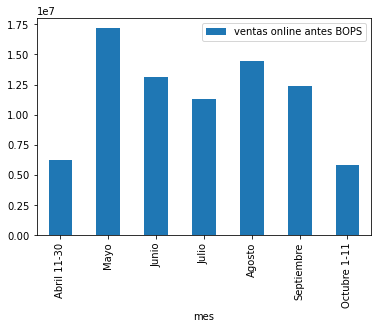

In [45]:
ganancias.plot(kind="bar",x="mes",y="ventas online antes BOPS")

Ventas online después de BOPS

In [46]:
dfonlineOctober = dfonline[dfonline["month"]==10]
dfonlineOctoberAf = dfonlineOctober[dfonlineOctober["after"]==1]
v1 = dfonlineOctoberAf["sales"].sum()

dfonlineNovemember = dfonline[dfonline["month"]==11]
v2 = dfonlineNovemember["sales"].sum()

dfonlineDic = dfonline[dfonline["month"]==12]
v3 =dfonlineDic["sales"].sum()

dfonlineJan = dfonline[dfonline["month"]==1]
v4 = dfonlineJan["sales"].sum()

dfonlineFeb = dfonline[dfonline["month"]==2]
v5 = dfonlineFeb["sales"].sum()

dfonlineMar = dfonline[dfonline["month"]==3]
v6 = dfonlineMar["sales"].sum()

dfonlineAbAf = dfonline[dfonline["month"]==4]
dfonlineAbAf[dfonlineAbAf["after"]==1]

,id (DMA),year,month,week,after,close,sales


In [47]:
nombre2 = ["Octubre 11-30", "Noviembre", "Diciembre","Enero", "Febrero", "Marzo", "Abril 1-11"]
ventas2 = [v1,v2,v3,v4,v5,v6,0]
Despues = {"mes":nombre2, "ventas online después BOPS": ventas2}
ganancias2 = pd.DataFrame(data=Despues)

In [48]:
ganancias2

,mes,ventas online después BOPS
0,Octubre 11-30,9187886.0
1,Noviembre,18380415.0
2,Diciembre,12706007.0
3,Enero,11798879.0
4,Febrero,8322754.0
5,Marzo,6459044.0
6,Abril 1-11,0.0


<AxesSubplot:xlabel='mes'>

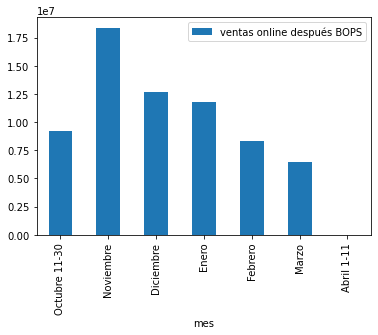

In [49]:
ganancias2.plot(kind="bar",x="mes",y="ventas online después BOPS")

ganancias2.plot(kind="bar",x="mes",y="ventas online después BOPS")

In [50]:
nombre3=nombre+nombre2
ventas3=ventas+ventas2
Total={"mes": nombre3, "ventas online": ventas3}
Ao = pd.DataFrame(data=Total)
Ao.sort_values("ventas online")

,mes,ventas online
13,Abril 1-11,0.0
6,Octubre 1-11,5801892.0
0,Abril 11-30,6216381.0
12,Marzo,6459044.0
11,Febrero,8322754.0
7,Octubre 11-30,9187886.0
3,Julio,11264609.0
10,Enero,11798879.0
5,Septiembre,12351809.0
9,Diciembre,12706007.0


<AxesSubplot:xlabel='mes'>

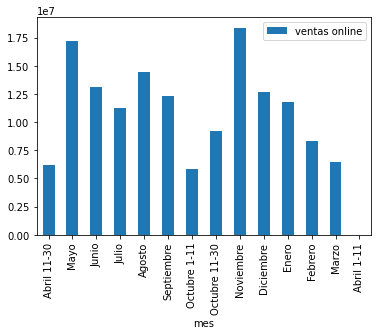

In [51]:
Ao.plot(kind="bar", x="mes", y="ventas online")

Ahora, veremos las ventas en físico mes a mes

Ventas físico antes de BOPS

In [52]:
dfbmAb = dfbm[dfbm["month"]==4]
x1 = dfbmAb["sales"].sum()

dfbmMayo = dfbm[dfbm["month"]==5]
x2 = dfbmMayo["sales"].sum()

dfbmJunio = dfbm[dfbm["month"]==6]
x3 = dfbmJunio["sales"].sum()

dfbmJulio = dfbm[dfbm["month"]==7]
x4 = dfbmJulio["sales"].sum()

dfbmAgosto = dfbm[dfonline["month"]==8]
x5 = dfbmAgosto["sales"].sum()

dfbmSep = dfbm[dfbm["month"]==9]
x6 = dfbmSep["sales"].sum()

dfbmOctober = dfbm[dfonline["month"]==10]
dfbmOctoberBf = dfbmOctober[dfonlineOctober["after"]==0]
x7 = dfbmOctoberBf["sales"].sum()

<ipython-input-52-87f140ea2f01>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfbmAgosto = dfbm[dfonline["month"]==8]
<ipython-input-52-87f140ea2f01>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfbmOctober = dfbm[dfonline["month"]==10]
<ipython-input-52-87f140ea2f01>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfbmOctoberBf = dfbmOctober[dfonlineOctober["after"]==0]


In [53]:
ventasbm=[x1,x2,x3,x4,x5,x6,x7]
AntesBM ={"mes":nombre, "ventas fisico antes BOPS": ventasbm}
gananciasbm=pd.DataFrame(data=AntesBM)

In [54]:
gananciasbm

,mes,ventas fisico antes BOPS
0,Abril 11-30,24681092.0
1,Mayo,29096766.0
2,Junio,24421761.0
3,Julio,19882239.0
4,Agosto,27890559.0
5,Septiembre,25525114.0
6,Octubre 1-11,11146015.0


<AxesSubplot:xlabel='mes'>

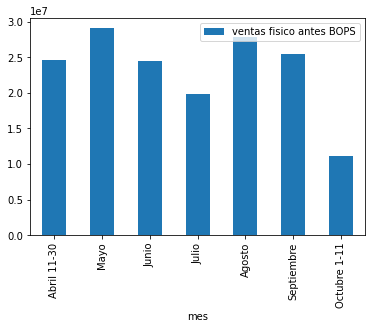

In [55]:
gananciasbm.plot(kind="bar",x="mes",y="ventas fisico antes BOPS")

Ventas fisico despues de BOPS

In [56]:
dfbmOctober = dfbm[dfbm["month"]==10]
dfbmOctoberAf = dfbmOctober[dfbmOctober["after"]==1]
y1 = dfbmOctoberAf["sales"].sum()

dfbmNovemember = dfbm[dfbm["month"]==11]
y2 = dfbmNovemember["sales"].sum()

dfbmDic = dfbm[dfbm["month"]==12]
y3 =dfbmDic["sales"].sum()

dfbmJan = dfbm[dfbm["month"]==1]
y4 = dfbmJan["sales"].sum()

dfbmFeb = dfbm[dfbm["month"]==2]
y5 = dfbmFeb["sales"].sum()

dfbmMar = dfbm[dfbm["month"]==3]
y6 = dfbmMar["sales"].sum()

dfbmAbAf = dfbm[dfbm["month"]==4]
dfbmAbAfter=dfbmAbAf[dfbmAbAf["after"]==1]
y7=dfbmAbAfter["sales"].sum()

In [57]:
ventas2bm = [y1,y2,y3,y4,y5,y6,y7]
Despuesbm = {"mes":nombre2, "ventas fisico después BOPS": ventas2bm}
ganancias2bm = pd.DataFrame(data=Despuesbm)

In [58]:
ganancias2bm

,mes,ventas fisico después BOPS
0,Octubre 11-30,14982501.0
1,Noviembre,26406729.0
2,Diciembre,26539938.0
3,Enero,22967261.0
4,Febrero,16730702.0
5,Marzo,19667916.0
6,Abril 1-11,9013847.0


<AxesSubplot:xlabel='mes'>

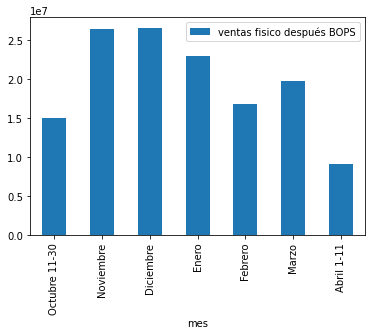

In [59]:
ganancias2bm.plot(kind="bar",x="mes",y="ventas fisico después BOPS")

Con esta nueva información, podemos contrastar las ventas online mes a mes antes y después de BOPS. La tabla y una gráfica de estos eventos queda como lo siguiente:

In [60]:
ventas3bm=ventasbm+ventas2bm
Total={"mes": nombre3, "ventas fisico": ventas3bm}
Aobm = pd.DataFrame(data=Total)
Aobm.sort_values("ventas fisico")

,mes,ventas fisico
13,Abril 1-11,9013847.0
6,Octubre 1-11,11146015.0
7,Octubre 11-30,14982501.0
11,Febrero,16730702.0
12,Marzo,19667916.0
3,Julio,19882239.0
10,Enero,22967261.0
2,Junio,24421761.0
0,Abril 11-30,24681092.0
5,Septiembre,25525114.0


<AxesSubplot:xlabel='mes'>

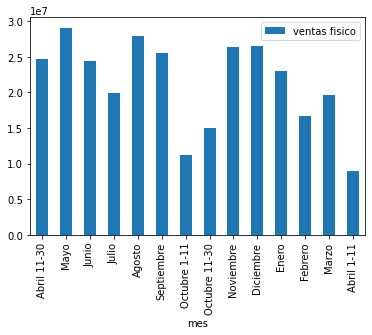

In [61]:
Aobm.plot(kind="bar", x="mes", y="ventas fisico")

A partir de estos datos podemos entonces hacer inferencias. En principio, podríamos pensar que se perdieron millones de dólares puesto que si contrastamos los semestres, podemos hacer el cálculo de sencillo de la diferencia de las sumas totales antes y después de aplicar BOPS y nos queda que

In [62]:
dfonlineAf = dfonline[dfonline["after"]==1]
w1 = dfonlineAf["sales"].sum()

dfonlineBef = dfonline[dfonline["after"]==0]
w2 = dfonlineBef["sales"].sum()

dfbmBef = dfbm[dfbm["after"]==0]
w3 =dfbmBef["sales"].sum()

dfbmAf = dfbm[dfbm["after"]==1]
w4= dfbmAf["sales"].sum()

la diferencia entre las ganancias online entre semestres es:

In [63]:
w1-w2

-13613629.0

mientras que la diferencia de las ganacias fisicas entre semestres es:

In [64]:
w4-w3

-17111578.0

Por lo que en el semestre después de implementar BOPS se obtuvieron $30,725,207 MENOS que en el semestre pasado.
Sin embargo, esto no quiere decir que la culpa sea por haber implementado BOPS. Para argumentar mi respuesta con respecto a que la diferencia de ganancias entre semestres no se debe directamente a BOPS me apoyaré de la información previa.

Un punto CLAVE a resaltar es que no podemos comparar directamente estos semestres debido a que las condiciones no son realmente cercanas, ya que hay épocas del año en que la gente gasta más dinero, y más aún, hay temporadas en que los productos ofrecidos por esta empresa pueden llegar a ponerse de moda.

Con respecto al inicio del semestre luego de haber implementado BOPS, las ventas online tuvieron un crecimiento a comparación de la primera quincena de octubre (a pesar de los problemas en el lanzamiento). Despúes, en el segundo mes, es decir, en Noviembre, se puede observar que hubo un aumento en la demanda online, esto puede significar que este sistema atrajo la atención del consumidor, y más adelante las compras online retornaron su curso.

Otro punto a favor de la diferencia negativa no recae en la implementación es que no hay datos de las ventas online en el último mes (Abril 2012), pero sí los hay en formato físico, lo cual presupone que los datos o bien no existen, o que fueron omitidos de alguna forma.

Finalmente, en el mes de Diciembre es natural pensar en que tenía que existir una baja puesto que el incremento de Noviembre fue muy alto en comparación con el semestre previo. Con respecto a los decrementos en los meses de Enero y Febrero, estos también se dan en tiendas físicas, por lo cual podemos observar que esta baja del consumidor se dio de manera general, independientemente de la implementación BOPS.

Es difícil hacer una inferencia a través de estos datos puesto que no tenemos datos mismos meses en años distintos para poder comparar como son las ventas en esas temporadas; lo que sí resulta cierto es que por los problemas de implementación al inicio y al mismo tiempo las diferencias entre la misma empresa, el sistema BOPS no está dando los resultados deseados con respecto al crecimiento anual de las ventas por internet, es decir, cada año hay más ventas online, lo cual debería verse reflejado en un crecimiento natural en las ventas online de esta empresa, sin embargo, necesitamos de los datos de años previos para conocer si realmente la tienda ha crecido en el sector online.

Para reforzar todavía la teoría de que no se han ganado ni perdido millones a causa de la implementación de BOPS podemos sacar los coeficientes de correlación y la covarianza entre los datos antes y después de llevar a cabo BOPS; sin embargo, sería algo injusto todavía tener conclusiones objetivas puesto que necesitamos de más datos para obtener conclusiones contundentes ya que comparar datos semestrales puede llegar a ser un error por lo antes mencionado.

### ¿Deberían expandirse a Canadá?

Primero veamos qué sucede con las compras que se realizan en Canada, aquí la implementación no afecta pues solamente ocurrió en Estados Unidos

In [65]:
dfbmCanada = dfbm[dfbm["usa"]==0]
dfbmCanada

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691.0
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804.0
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104.0
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591.0
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884.0
...,...,...,...,...,...,...,...
4423,165.0,2012.0,3.0,12.0,0.0,1.0,26760.0
4424,165.0,2012.0,3.0,13.0,0.0,1.0,34770.0
4425,165.0,2012.0,3.0,14.0,0.0,1.0,41192.0
4426,165.0,2012.0,4.0,15.0,0.0,1.0,31082.0


In [66]:
dfbmCanadaAbril = dfbmCanada[dfbmCanada["month"]==4]
dfbmCanadaAbril2011 = dfbmCanadaAbril[dfbmCanadaAbril["year"]==2011]
z1 = dfbmCanadaAbril2011["sales"].sum()

dfbmCanadaMayo = dfbmCanada[dfbmCanada["month"]==5]
z2 = dfbmCanadaMayo["sales"].sum()

dfbmCanadaJunio = dfbmCanada[dfbmCanada["month"]==6]
z3 = dfbmCanadaJunio["sales"].sum()

dfbmCanadaJulio = dfbmCanada[dfbmCanada["month"]==7]
z4 = dfbmCanadaJulio["sales"].sum()

dfbmCanadaAgosto = dfbmCanada[dfbmCanada["month"]==8]
z5 = dfbmCanadaAgosto["sales"].sum()

dfbmCanadaSeptiembre = dfbmCanada[dfbmCanada["month"]==9]
z6 = dfbmCanadaSeptiembre["sales"].sum()

dfbmCanadaOctubre = dfbmCanada[dfbmCanada["month"]==10]
z7 = dfbmCanadaOctubre["sales"].sum()

dfbmCanadaNoviembre = dfbmCanada[dfbmCanada["month"]==11]
z8 = dfbmCanadaNoviembre["sales"].sum()

dfbmCanadaDiciembre = dfbmCanada[dfbmCanada["month"]==12]
z9 = dfbmCanadaDiciembre["sales"].sum()

dfbmCanadaEnero = dfbmCanada[dfbmCanada["month"]==1]
z10 = dfbmCanadaEnero["sales"].sum()

dfbmCanadaFebrero = dfbmCanada[dfbmCanada["month"]==2]
z11 = dfbmCanadaFebrero["sales"].sum()

dfbmCanadaMarzo = dfbmCanada[dfbmCanada["month"]==3]
z12 = dfbmCanadaMarzo["sales"].sum()

dfbmCanadaAbril = dfbmCanada[dfbmCanada["month"]==4]
dfbmCanadaAbril2012 = dfbmCanadaAbril[dfbmCanadaAbril["year"]==2012]
z13 = dfbmCanadaAbril2011["sales"].sum()

In [67]:
meses = ["Abril11", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre", "Enero", "Febrero", "Marzo","Abril12"]
ventasCanada = [z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13]
gananciasCanada= {"meses": meses, "ventas":ventasCanada}
CanadaTotal=pd.DataFrame(data=gananciasCanada)
CanadaTotal

,meses,ventas
0,Abril11,3223919.0
1,Mayo,5574215.0
2,Junio,4909941.0
3,Julio,3989253.0
4,Agosto,4715835.0
5,Septiembre,5108483.0
6,Octubre,5985028.0
7,Noviembre,4921546.0
8,Diciembre,5047659.0
9,Enero,4465885.0


<AxesSubplot:xlabel='meses'>

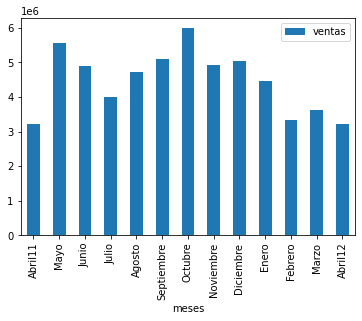

In [68]:
CanadaTotal.plot(kind="bar", x="meses", y="ventas")

Analicemos ahora el comportamiento de las compras mes a mes en Estados Unidos que se encuentran lejos de tiendas:

In [69]:
dfonlineclose = dfonline[dfonline["close"]==0]

In [70]:
dfonlinecloseAbril = dfonlineclose[dfonlineclose["month"]==4]
dfonlinecloseAbril2011 = dfonlinecloseAbril[dfonlinecloseAbril["year"]==2011]
a1 = dfonlinecloseAbril2011["sales"].sum()

dfonlinecloseMayo = dfonlineclose[dfonlineclose["month"]==5]
a2 = dfonlinecloseMayo["sales"].sum()

dfonlinecloseJunio = dfonlineclose[dfonlineclose["month"]==6]
a3 = dfonlinecloseJunio["sales"].sum()

dfonlinecloseJulio = dfonlineclose[dfonlineclose["month"]==7]
a4 = dfonlinecloseJulio["sales"].sum()

dfonlinecloseAgosto = dfonlineclose[dfonlineclose["month"]==8]
a5 = dfonlinecloseAgosto["sales"].sum()

dfonlinecloseSeptiembre = dfonlineclose[dfonlineclose["month"]==9]
a6 = dfonlinecloseSeptiembre["sales"].sum()

dfonlinecloseOctubre = dfonlineclose[dfonlineclose["month"]==10]
a7 = dfonlinecloseOctubre["sales"].sum()

dfonlinecloseNoviembre = dfonlineclose[dfonlineclose["month"]==11]
a8 = dfonlinecloseNoviembre["sales"].sum()

dfonlinecloseDiciembre = dfonlineclose[dfonlineclose["month"]==12]
a9 = dfonlinecloseDiciembre["sales"].sum()

dfonlinecloseEnero = dfonlineclose[dfonlineclose["month"]==1]
a10 = dfonlinecloseEnero["sales"].sum()

dfonlinecloseFebrero = dfonlineclose[dfonlineclose["month"]==2]
a11 = dfonlinecloseFebrero["sales"].sum()

dfonlinecloseMarzo = dfonlineclose[dfonlineclose["month"]==3]
a12 = dfonlinecloseMarzo["sales"].sum()

In [71]:
calendario=["Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre", "Enero", "Febrero", "Marzo"]
ventasclose=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12]
Close={"mes":calendario,"ventas": ventasclose}
closeTotal = pd.DataFrame(data=Close)
closeTotal

,mes,ventas
0,Abril,3604937.0
1,Mayo,9686422.0
2,Junio,7289544.0
3,Julio,6137277.0
4,Agosto,7881103.0
5,Septiembre,6617962.0
6,Octubre,8346111.0
7,Noviembre,10398055.0
8,Diciembre,7040735.0
9,Enero,6474278.0


<AxesSubplot:xlabel='mes'>

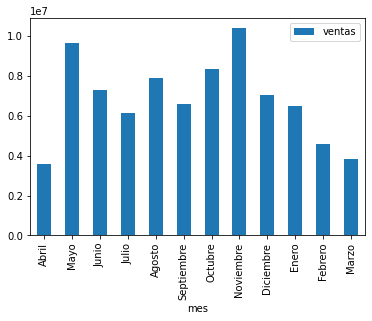

In [72]:
closeTotal.plot(kind="bar", x="mes", y="ventas")

Revisando la media y desviacion estándar de las ventas en Canada tenemos:

In [73]:
CanadaTotal["ventas"].mean()

4471476.230769231

In [74]:
CanadaTotal["ventas"].std()

914982.8257985824

Esto nos indica que las ventas por meses varía mucho en Canadá, pueden existir meses buenos así como meses de temporada baja.
Luego, analizando la media y desviación estándar de la ventas online en Estados Unidos tenemos:

In [75]:
closeTotal["ventas"].mean()

6825331.916666667

In [76]:
closeTotal["ventas"].std()

2122616.083509449

Aquí sucede lo contrario, la desviación estándar no se aleja mucho de su promedio.

En conclusión, expandirse a Canada puede ser una buena estrategia ya que el comercio de ventas físicas varía mucho por temporadas; a diferencia del comportamiento mostrado por el sistema online en EU. Sin embargo, no recomendaría hacer dicha estrategia hasta no ver cambios favorables en la implementación BOPS primiero en EU y de allí realmente conocer si dicha decisión es estable.